In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.constants import hbar, pi
from becpy.physics import Na

from mcbec1d import BoseGas1d
from mcsample import canonical_sampling

omega = 2*pi*30
a_ho = np.sqrt(hbar/Na.mass/omega)

AR = 50 # aspect ratio

g_int = 2*AR*Na.sclength/a_ho #normalized interaction

In [3]:
Na.sclength/a_ho

0.0007189611515279186

In [4]:
def mu1_N(N):
    return .5*(3*N*AR*Na.sclength/a_ho)**(2./3)

def psi_TF(x, N):
    return np.sqrt(np.maximum(0, (mu1_N(N) - x**2/2)/g_int))

set initial MC step h: 0.5


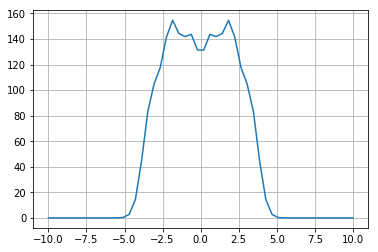

In [5]:
def approx_TF(N, K):
    mu1 = mu1_N(N)
    C0 = np.zeros((K,), dtype=np.complex)
    k0 = int(np.ceil(mu1))
    for k in range(0,k0+1,2):
        C0[k] = 1 - (k/k0)**0.7
    return C0
    

K = 61
N = 1000
beta = 1/K

P = BoseGas1d(cutoff=K, Natoms=N, g_int=g_int, beta=beta, step=0.5)
P.state = P.renormalize(approx_TF(N, K))


x = np.linspace(-10, 10, 50)

n0 = np.abs(P.to_space(P.state, x))**2

plt.plot(x, n0)

plt.grid()

In [6]:
ID = 'bose1d'
print('MC sampling start')
P, E, ensamble, et = canonical_sampling(P, ID, beta, n_ensamble=8000)
print('MC sampling end (elapsed time: %.1f s)' % et)
print('Initial energy: %f' % E[0])
print('Final energy:   %f' % E[-1])

ens_c = np.asarray(ensamble)

MC sampling start
MC sampling end (elapsed time: 6.3 s)
Initial energy: 6930.144232
Final energy:   9437.653959


In [7]:
logfile = 'log_ensamble_%s.dat' % ID
print(logfile)
energy, acceptance, step = np.genfromtxt(logfile, skip_header=6, skip_footer=2, delimiter=None, unpack=True)

log_ensamble_bose1d.dat


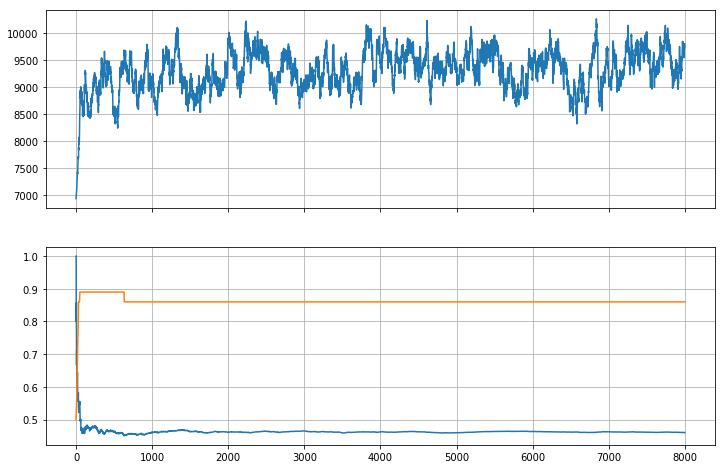

In [8]:
fig, (a1, a2,) = plt.subplots(2,1, figsize=(12,8), sharex=True)

sel = slice(0, None)
a1.plot(energy[sel])
a2.plot(acceptance[sel])
a2.plot(step[sel])
a1.grid()
a2.grid()

In [9]:
n_TF = psi_TF(x, N)**2

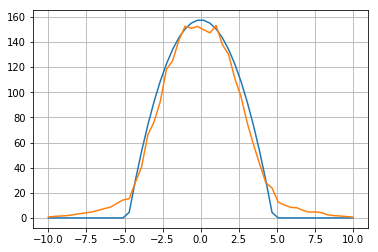

In [10]:
psi = P.to_space(ens_c[1000:], x)

n_mean = np.mean(np.abs(psi)**2, axis=0)

plt.plot(x, n_TF)
plt.plot(x, n_mean)
plt.grid()